# Gastos Rochester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

In [2]:
gastos = pd.read_csv('Rochester_gastos.csv')

In [3]:
gastos.tail(8)

,Fecha,Lugar,Categoria,Sub_categoria,Total
218,6/4/2020,T-mobile,Servicios,Celular,98.15
219,6/2/2020,Spotify,Servicios,Otros,9.99
220,6/2/2020,Hercules,Servicios,Laundry,10.00
221,6/6/2020,Chipotle,Restaurant,Cena,11.56
222,6/6/2020,Home depot,Supermercado,Unicos,33.71
223,6/13/2020,USPS,Otros,Taxes,3.09
224,6/13/2020,Tops,Supermercado,Higiene,6.24
225,6/13/2020,Tops,Supermercado,Comida,50.92


In [4]:
gastos.dtypes

Fecha             object
Lugar             object
Categoria         object
Sub_categoria     object
Total            float64
dtype: object

In [5]:
gastos['Fecha']=pd.to_datetime(gastos['Fecha'])

In [6]:
gastos['Month']=gastos['Fecha'].dt.month

In [7]:
gastos['Day']=gastos['Fecha'].dt.day

In [8]:
gastos.shape

(226, 7)

In [9]:
gastos.groupby('Month').Total.sum()

Month
2    4522.96
3    3381.26
4    2144.38
5    2639.78
6    1311.01
Name: Total, dtype: float64

In [10]:
categorias = gastos.groupby(['Categoria','Month']).Total.sum()

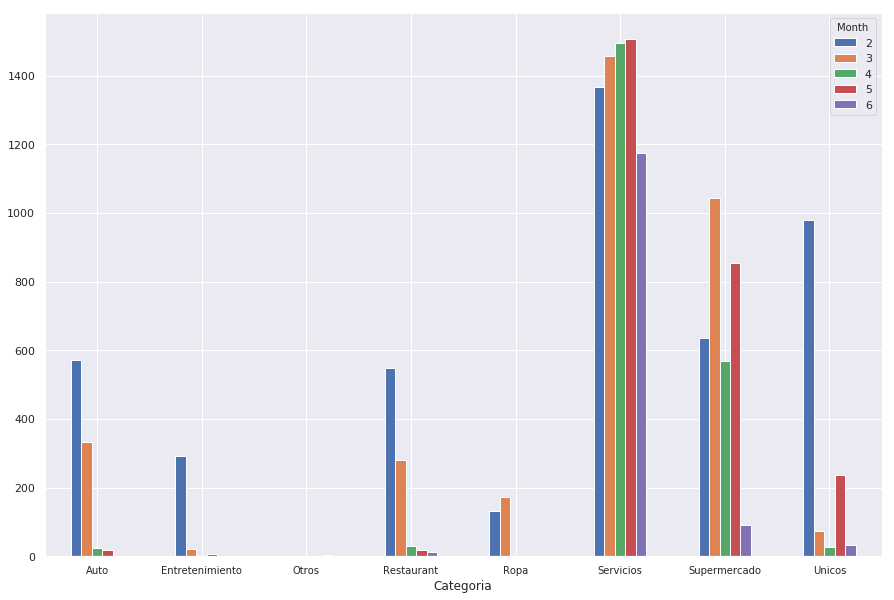

In [11]:
categorias.unstack().plot(kind='bar', stacked=False,figsize=[15,10])
plt.xticks(
    rotation=0,
   # horizontalalignment='right',
   # fontweight='light',
    fontsize='medium',
);

In [12]:
gastos.groupby(['Categoria','Sub_categoria','Month']).Total.sum()

Categoria        Sub_categoria     Month
Auto             Arreglos          2         362.65
                 Insurance         3         265.67
                 Lavado            2          23.71
                                   4          23.71
                 Nafta             2         115.75
                                   3          41.18
                                   5          18.86
                 Otros             2          43.12
                 Peajes            2          25.00
                                   3          25.00
Entretenimiento  Alquiler peli     5           5.99
                 Bowling           2          30.00
                                   3          21.00
                 Cine              2          57.80
                 Teatro            2         205.10
Otros            Taxes             6           3.09
Restaurant       Almuerzo          2         188.35
                                   3         125.62
                       

In [13]:
#gastos[gastos.Categoria == 'Restaurant'].groupby(['Lugar']).Total.sum()

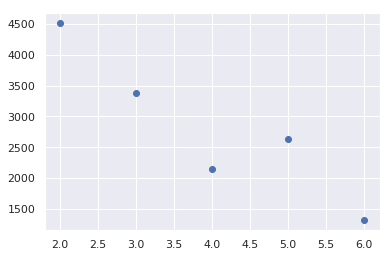

In [14]:
plt.plot(gastos.groupby('Month').Total.sum(),'o');

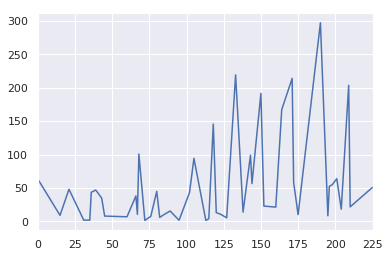

In [15]:
gastos[gastos.Sub_categoria == 'Comida'].Total.plot()

In [16]:
comida = gastos[gastos.Sub_categoria == 'Comida']

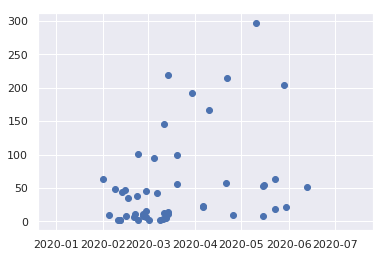

In [17]:
plt.scatter(x=comida['Fecha'],y=comida['Total'])